## Exploratory Data Analysis

Hello, I am Samuel. This notebook focuses on EDA of life expectancy of 165 countries and we will look into the dataset to get to draw insight. 
I am open to contributions from fellow analyst <hr style="width:100%; height:2px; background: #000">

<span id='top'></span>

## The following will be considered 
**<a href="#preliminary" style="text-decoration:none;">1. Preliminary</a>**<br>
**<a href="#uni_ana" style="text-decoration:none;">2. Univariant Analysis</a>**<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**<a href="#cat1" style="text-decoration:none;">- Categorical features </a>**<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**<a href="#num1" style="text-decoration:none;">- Numerical Features </a>**<br>
**<a href="#mul_ana" style="text-decoration:none;">3. Multivariant Analysis</a>**<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**<a href="#cat2" style="text-decoration:none;">- Categorical Features </a>**<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**<a href="#num2" style="text-decoration:none;">- Numerical Features </a>**<br>
**<a href="#explore" style="text-decoration:none;">3. Exploring other things</a>**<br>

<hr style="width:100%; height:1px; background: #000">


### Dataset Description


The data provided in this <a href='https://bit.ly/HDSC-StageOneDataset'>Github link</a> is the life expectancy data from the kaggle which is provided by the World Health Organization (W.H.O). The data consists of the following columns:

'Country' : Country <span style="border-left:2px solid black;height:2px;margin-left:300px;padding-left:30px;">'Status': Status </span>
    
 'Year': Year


'Lifeexpectancy': Life Expectancy of each country <span style="border-left:2px solid black;height:2px;margin-left:198px;padding-left:30px;">'AdultMortality': Adult mortality rate of sexes (15-60years)</span>


'infantdeath': Infant death rate of both sexes (1months - 1year) <span style="border-left:2px solid black;height:2px;margin-left:156px;padding-left:30px;">'Alcohol': Alcohol per capital consumption</span>


'percentageexpenditure': Expenditure on health <span style="border-left:2px solid black;height:2px;margin-left:84px;padding-left:30px;">'HepatitisB': Hepatitis B immunization coverage among 1 year old </span>

'Measles': number of reported cases per 1000 population <span style="border-left:2px solid black;height:2px;margin-left:84px;padding-left:30px;">'BMI': Average body mass index of entire population </span>

'under-fivedeaths': Number of under five death per 1000 population <span style="border-left:2px solid black;height:2px;margin-left:84px;padding-left:30px;">'Polio': Polio immunization coverage among 1 year old </span>

'Totalexpenditure': General government expenditure on health <span style="border-left:2px solid black;height:2px;margin-left:84px;padding-left:30px;">'Diphteria': Diptheria immunization coverage among 1 year old </span>

'HIV/AIDS': Death per 1000 live <span style="border-left:2px solid black;height:2px;margin-left:84px;padding-left:30px;">'GDP': Gross domestic product per capital </span>

'Population': Popuation of the country <span style="border-left:2px solid black;height:2px;margin-left:84px;padding-left:30px;">'thinness1-19years': Prevalence of thinness between age 10-19 </span>

'thinness5-9years': prevalence of thinness among children age 5-9  <span style="border-left:2px solid black;height:2px;margin-left:84px;padding-left:30px;">'Incomecompositionofresources': Human development index of income </span>

'Schooling': Number of years in school <span style="border-left:2px solid black;height:2px;margin-left:84px;padding-left:30px;">'Region': Regions f countries </span>

'IncomeGroup': Levels of income of each countries 
<hr style="width:100%; height:1px; background: #000">

<p id='preliminary'></p>
<br><br>

## 1. Preliminary

### Import dependencies

In [2]:
#import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

### Load the save dataset

In [3]:
#import the save dataset
df = pd.read_csv(r"C:\Users\lenovo\Desktop\DSN\December data science project\Regression (Life Expectancy prediction)\df.csv")

### Dataset Description

In [4]:
print("shape:", df.shape)

shape: (165, 25)


In [5]:
print("Column names:", df.columns)

Column names: Index(['Country', 'Year', 'Status', 'Lifeexpectancy', 'AdultMortality',
       'infantdeaths', 'Alcohol', 'percentageexpenditure', 'HepatitisB',
       'Measles', 'BMI', 'under-fivedeaths', 'Polio', 'Totalexpenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness1-19years',
       'thinness5-9years', 'Incomecompositionofresources', 'Schooling',
       'TableName', 'Region', 'IncomeGroup'],
      dtype='object')


In [6]:
df.head()

,Country,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,...,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling,TableName,Region,IncomeGroup
0,Afghanistan,2016.0,Developing,58.19375,269.0625,78.2500,0.014375,34.960110,64.5625,2362.2500,...,0.10000,340.015425,9972259.813,16.58125,15.58125,0.415375,8.21250,Afghanistan,South Asia,Low income
1,Albania,2016.0,Developing,75.15625,45.0625,0.6875,4.848750,193.259091,98,53.3750,...,0.10000,2119.726679,696911.625,1.61875,1.70000,0.709875,12.13750,Albania,Europe & Central Asia,Upper middle income
2,Algeria,2016.0,Developing,73.61875,108.1875,20.3125,0.406667,236.185241,78,1943.8750,...,0.10000,2847.853392,21649827.44,6.09375,5.97500,0.694875,12.71250,Algeria,Middle East & North Africa,Lower middle income
3,Angola,2016.0,Developing,49.01875,328.5625,83.7500,5.740667,102.100268,70.22222222,3561.3125,...,2.36875,1975.143045,10147099.19,6.19375,6.66875,0.458375,8.04375,Angola,Sub-Saharan Africa,Lower middle income
4,AntiguaandBarbuda,2016.0,Developing,75.05625,127.5000,0.0000,7.949333,1001.585226,98.26666667,0.0000,...,0.12500,9759.305728,NaN,3.42500,3.37500,0.488625,8.84375,AntiguaandBarbuda,Latin America & Caribbean,High income


In [7]:
df.drop(["Year", "TableName"], axis = 1, inplace = True)

**Do we have missing values?**

In [8]:
df.isnull().sum()

Country                          0
Status                           4
Lifeexpectancy                   0
AdultMortality                   0
infantdeaths                     0
Alcohol                          1
percentageexpenditure            0
HepatitisB                       5
Measles                          0
BMI                              2
under-fivedeaths                 0
Polio                            0
Totalexpenditure                 1
Diphtheria                       0
HIV/AIDS                         0
GDP                             11
Population                      23
thinness1-19years                2
thinness5-9years                 2
Incomecompositionofresources     4
Schooling                        4
Region                           0
IncomeGroup                      0
dtype: int64

**We have missing rows in Status, Alcohol, HepatitisB, BMI, Totalexpenditure, GDP, Population, thinness1-19years, thinness5-9years, Income composition of resources and schooling in the dataset**

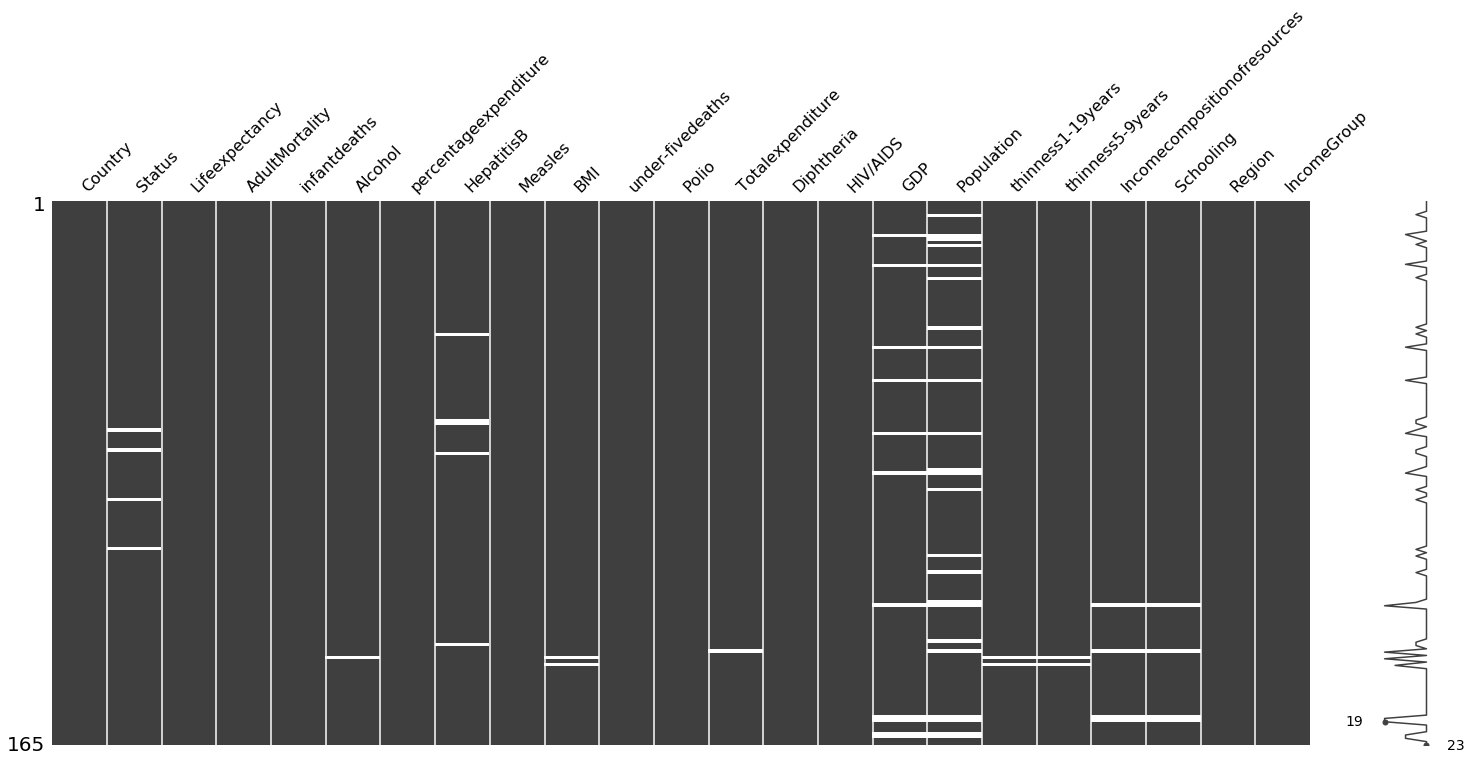

In [9]:
import missingno as msno
msno.matrix(df)

**The horizontal lines in dataset column shows the areas where the missing data are located 
and it also indicates that the number of missing values is small compared to the entire dataset.**<br>
**We will fix the missing values later in the exploration**

**From this we have 4 categorical features and 19 numerical features**

In [10]:
cat_features = df.select_dtypes(exclude = np.number).columns.to_list()
Num_features = df.select_dtypes (include = np.number).columns.to_list()
print("Cat features:", cat_features)
print("Num features:", Num_features)

Cat features: ['Country', 'Status', 'HepatitisB', 'Population', 'Region', 'IncomeGroup']
Num features: ['Lifeexpectancy', 'AdultMortality', 'infantdeaths', 'Alcohol', 'percentageexpenditure', 'Measles', 'BMI', 'under-fivedeaths', 'Polio', 'Totalexpenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'thinness1-19years', 'thinness5-9years', 'Incomecompositionofresources', 'Schooling']


**Fixing missing values with mode and mean**

In [11]:
df["Status"].value_counts()

Developing    132
Developed      29
Name: Status, dtype: int64

In [12]:
df["Status"] = df["Status"].fillna("Developing")

In [13]:
df["Alcohol"] = df["Alcohol"].fillna(df["Alcohol"].mean())
df["HepatitisB"] = df["HepatitisB"].fillna(df["HepatitisB"].mean())
df["BMI"] = df["BMI"].fillna(df["BMI"].mean())
df["Totalexpenditure"] = df["Totalexpenditure"].fillna(df["Totalexpenditure"].mean())
df["thinness1-19years"] = df["thinness1-19years"].fillna(df["thinness1-19years"].mean())
df["thinness5-9years"] = df["thinness5-9years"].fillna(df["thinness5-9years"].mean())
df["Incomecompositionofresources"] = df["Incomecompositionofresources"].fillna(df["Incomecompositionofresources"].mean())
df["Schooling"] = df["Schooling"].fillna(df["Schooling"].mean())
df["GDP"] = df["GDP"].fillna(df["GDP"].mean())
df["Population"] = df["Population"].fillna(df["Population"].mean())

TypeError: can only concatenate str (not "int") to str

**No more missing values** 

In [ ]:
df.isna().sum()

<p id='uni_ana'></p>
<br><br>

## Univariant Analysis

**Analysis of some key feature of the dataset**

<p id='cat1'></p><br>


#### Categorical features

In [ ]:
cat_features

We are not interested in the country feature since it is just a unique identifier
<br><br><br>**Plot of countries Status**

In [ ]:
sns.set(style ="darkgrid", palette = "deep", font_scale = 1.1, rc = {"figure.figsize": (10,8)})

In [ ]:
sns.countplot(x = "Status", data = df)

In [ ]:
sns.countplot(data = df, y= "Region", order= df.Region.value_counts().nlargest(15).index)

#### Plot by Region

In [ ]:
sns.countplot(data = df, y= "IncomeGroup", order = df.IncomeGroup.value_counts().nlargest(15).index)

#### Plot by Income Group

### Observations
1. We have more of developing countries<br>
2. Sub-saharan Africa and Europe & Central Asia are more represented in the dataset<br>
3. Countries that generate upper middle or high income are well represented**

<p id='num1'></p><br>

### Numerical features

In [ ]:
Num_features

In [ ]:
df.describe()

In [ ]:
sns.distplot(df["Lifeexpectancy"],  norm_hist = False, kde = True, bins = 20, hist_kws = {"alpha": 1}).set(xlabel = "Life expectancy", )

### Distribution of life expectancy<br>
**The distribution is almost from a bell curve (normally distributed) <br>
**Countries with more life expectancy fall between 72-82

### Let us calculate the skewness of each of the numeric features

Skewness is a statistical measure that quantifies the symmetry of the distribution. <br>
Skewness is the standardized third central moment and Kurtosis is the standardized <br>
fourth central moment.<br>
*A distribution may be skewed in the positive direction or negative direction.<br>
*A positively skewed distribution has a long tail on the right side and negatively <br>
&nbsp;&nbsp;&nbsp;&nbsp;skewed distribution has a long tail on the left side.<br>
*A right tailed distribution or a  positively skewed distribution has its mean greater<br>
&nbsp;&nbsp;&nbsp;&nbsp;than the median as the outliers present in the skewed right tail of the distribution influence the mean.<br>
*A left tailed distribution has its mean smaller than the median.

In [ ]:
df.skew()

**How can you interpret the skewness number?**

**If skewness is less than −1 or greater than +1, the distribution is highly skewed.** <br>
**If skewness is between −1 and −½ or between +½ and +1, the distribution is moderately skewed.**<br>
**If skewness is between −½ and +½, the distribution is approximately symmetric.**<br>
<br>
Most of the numeric features are greatly skewwed except report_year<br>


**infant deaths, percentage expenditure, measles, under-fivedeaths HIV/AIDS, GDP, Population are highly skewed. This will be dealt with during the model building phase**

#### <a href="#top" style="text-decoration:none;"><i>Back to Top</i></a>
<hr style="width:100%; height:1px; background: #000">

<p id='mul_ana'></p>
<br><br>

## Multivariant Analysis

<p id='cat2'></p><br>

### Categorical features

**In this aspect of our exploration, we will answer some questions using the dataset**<br>

Let us find relation in our categorical features<br>
We will consider the following features: ['Status', 'Region', 'Income group']

In [ ]:
sns.relplot(data= df, x = "Status", y = "Region")

#### Plot showing relationship between status and regions<br>
** Latin America & Caribbean, Sub-saharan Africa and South Asia have no developed countries. they all contain developinig countries


In [ ]:
sns.relplot(data = df, x = "Status", y = "IncomeGroup")

#### Plot showing relationship between Status and Income Group<br>
** None of the developed countries has low or lower middle income. they all contain upper middle and High income


In [ ]:
sns.countplot(data = df, x = "IncomeGroup", hue= "Region")

#### Plot showing relationship between Income Group and Regions

<p id='num2'></p><br>

### Numerical features

In [ ]:
a = sns.FacetGrid(df, col = "Region")
a.map(plt.hist, "Lifeexpectancy")

#### Distribution of life expectancy across regions

In [ ]:
a = sns.FacetGrid(df, col = "IncomeGroup")
a.map(plt.hist, "Lifeexpectancy")

#### Distribution of life expectancy across Income Groups

In [ ]:
a = sns.FacetGrid(df, col = "Status")
a.map(plt.hist, "Lifeexpectancy")

#### Distribution of life expectancy across Income Groups

In [ ]:
sns.pairplot(data = df,)

In [ ]:
sns.heatmap(df.corr(), annot = False)

In [ ]:
df.corr()

**infant deaths, Measles, Population will be removed during model building phase because they have no relationship with the life expectancy**

 #### Export my new dataframe to csv for easy model building instead of working on it again.

In [ ]:

df.to_csv(r"C:\Users\lenovo\Desktop\DSN\December data science project\Regression (Life Expectancy prediction)\eda_df.csv", index = False)

**The notebook is getting quiet longer and we still have some unanswered questions.**
<p>Some of those questions include: </p>
<p>Feel free to fork this notebook and star it on <a href='https://github.com/owenrabbai/Hamoye-Internship'>here on github.</a></p>
<p>Contributions will be greatly valued.</p>